# Coastal Systems Notebook 2 (week 3): The Tide

In chapter 3 of the book and slides, we learned that the tide is generated through the interplay between gravitational attraction forces in the Earth-Moon and Earth-Sun systems respectively. In this notebook we will explore these concepts in a more interactive way, with some exercises, visualizations, and code. We will not repeat the whole theory, however, so make sure you have followed the lectures for this week and read the relevant pages in chapter 3 of the book.

We will explore the different aspects of teh tide through this Jupyter notebook and use python to create figures, make computations, and analyse data. So, please make sure you activate the coastal environment before running the notebook. Then run the cell below, where we import the packages used in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Generation of the tide

First we will have a look at the generation of the tide. To start, we are gonna look at the gravitational forces between the earth, moon, and sun. 

In [2]:
### Functions
def grav_pull(m1, m2, d):
    """
    This function calculates the attraction force between two celestial bodies using Newton's law of universal gravitation.

    Parameters:
    m1 (float): mass of the first body in kg.
    m2 (float): mass of the second body in kg.
    r (float): distance between the two bodies in meters.

    Returns:
    float: the attraction force between the two bodies in Newton (N)

    """
    G = 6.67408e-11  # universal gravitational constant
    g = 9.81         # gravitational acceleration on the Earth
    force = G * (m1 * m2) / d**2 / g # here we divide by g, so we get the gravitational pull in terms of g
    return force

The above function computes the gravitational pull between two celestial bodies. We can now use it to compute the forces between the earth and the sun/moon. Find the required values and fill them in below and then run the function, which will show you the forces.

In [3]:
m_earth = 1         # mass of the earth in kg (we use 1 to compute the gravitational pull on 1kg of earth mass)
m_sun   = 1.99e30   # mass of the sun in kg
m_moon  = 7.35e22   # mass of the moon in kg
d_sun   = 1.5e11    # distance between the centers of the sun and earth in meters
d_moon  = 3.84e8    # distance between the centers of the moon and earth in meters
r       = 6.37e6    # radius of the Earth in meters

# Now we compute the forces and print them
f_es = grav_pull(m_earth, m_sun, d_sun)
f_em = grav_pull(m_earth, m_moon, d_moon)

print("Attraction force between the centers of Earth and Sun:  %.2E g"%f_es)
print("Attraction force between the centers of Earth and Moon: %.2E g"%f_em)

Attraction force between the centers of Earth and Sun:  6.02E-04 g
Attraction force between the centers of Earth and Moon: 3.39E-06 g


As we can see, the gravitational pull of the sun is about two orders of magnitude larger than that of the moon, and both are much smaller than g. Yet, we know that these forces are somehow responsible for tidal ranges of multiple meters, and that the moon is actually responsible for about 70% of these tides. How come?

...

## 2. Tidal constituents

The tidal signal can be broken down into multiple harmonic tidal constituents. These can either be diurnal, semi-diurnal, or longer-period constituents. Each constituent is characterized by an amplitude, frequency and phase, and individually looks like a sin/cosine curve. When we sum up the various components however, we get complex tidal signals, with spring-neap cycles, daily inequalities, and longer-term variations. Below we will compute the tidal signal at four different locations around the World: Scheveningen (Netherlands), Rio de Janeiro (Brazil), Galveston (Texas USA), and Jakarta (Indonesia). To do this, we will use six harmonic components: M2, S2, K1, O1, M4, and Mf. Section 3.7.6. in the book gives some more information on each constituents.

In [4]:
### Functions
def harmonic(a, phi, f, t):
    """
    This function calculates the value of a harmonic function at a given time t.

    Parameters:
    a (float): amplitude of the harmonic function.
    phi (float): phase angle of the harmonic function.
    f (float): frequency of the harmonic function.
    t (float): time at which the function is evaluated.

    Returns:
    float: the value of the harmonic function at the given time.
    """
    return a * np.cos(f*t-phi)


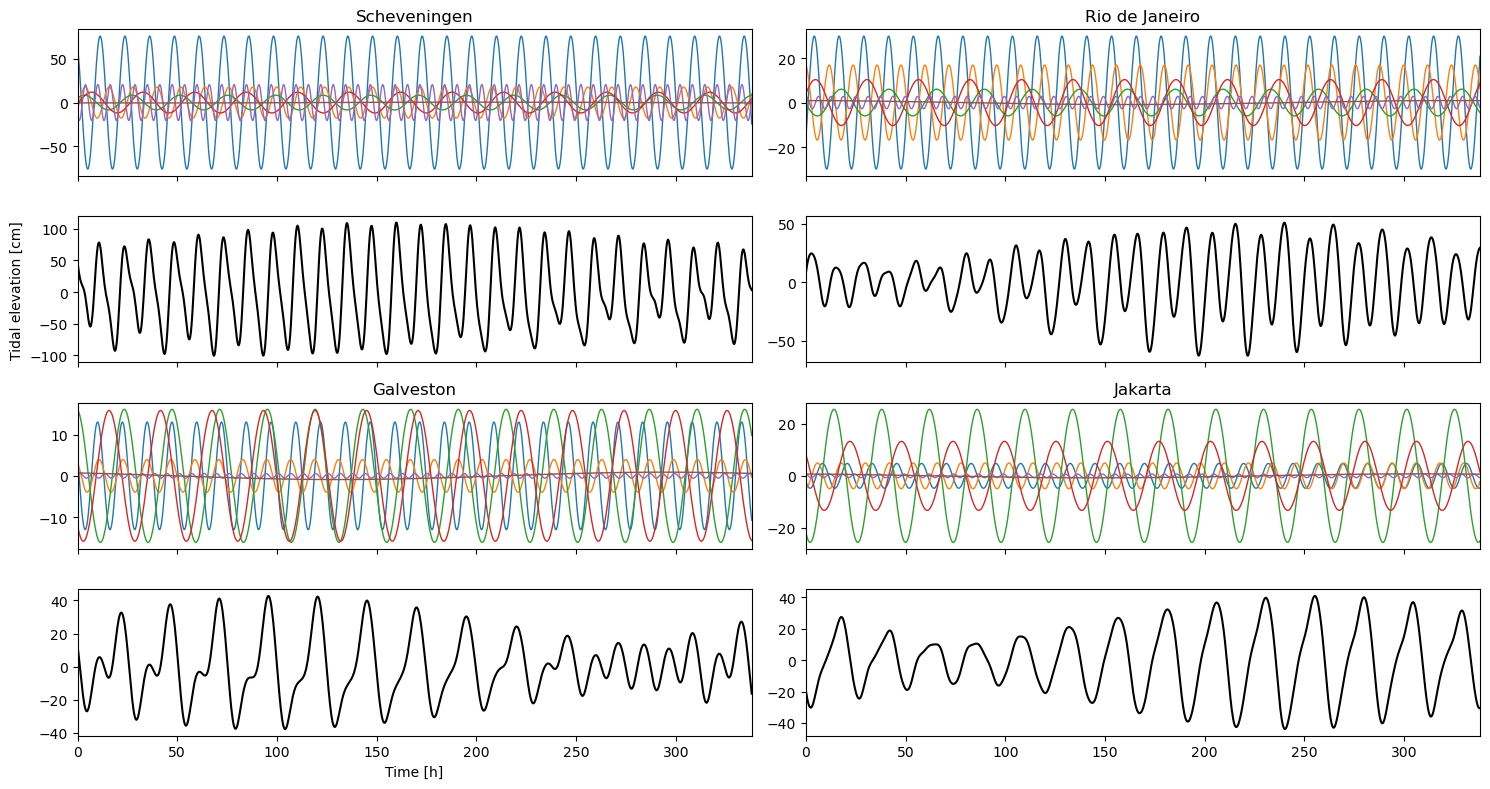

In [12]:
# Time window for which we will compute the tidal components
t = np.linspace(0,338,1000)



# Tidal components and their angular frequencies (numer to the right is the period in hours)
# Comment / uncomment to select the contituents that are plotted
comps = {
    'm2'    :   2*np.pi / 12.42,    # Principal lunar semidiurnal
    's2'    :   2*np.pi / 12,       # Principal solar semidiurnal
    'k1'    :   2*np.pi / 23.93,    # Lunar-solar declinational diurnal
    'o1'    :   2*np.pi / 25.82,    # Principal lunar diurnal
    'm4'    :   2*np.pi / 6.21,     # First shallow water lunar overtide
    'mf'    :   2*np.pi / 327.9,    # Lunisolar fortnightly period
}

# First we load the data (tidal constituents) into a dictionary so that we have one dataframe for each constituent (M2, S2, ...)
tide = {}
for comp in comps.keys():
    tide[comp] = pd.read_pickle('data/%s.p'%comp)

# Locations that we will plot
locs = ['Scheveningen', 'Rio de Janeiro', 'Galveston', 'Jakarta']

# Now we plot for each location a plot with the individual components and a plot for the total tidal water level
fig, axs = plt.subplots(4,2, sharex=True, figsize=(15,8))
ax = axs.flatten()

for i,j in zip(range(len(locs)), [0,1,4,5]):
    harms = {}
    for comp in comps.keys():
        # Store data for current component in temporary numpy array
        temp = tide[comp][tide[comp].index == locs[i].lower()].to_numpy()[0]

        # Use harmonic() to compute each harmonic constituent
        harms[comp] = harmonic(temp[3], temp[2], comps[comp], t)            

        # Plot each individual constituent in the upper subplot  
        ax[j].plot(t,harms[comp], '-', linewidth=1)

    # Plot the sum of the selected constituents in the lower subplot
    ax[j+2].plot(t,sum([harms[comp] for comp in comps.keys()]),'k')

    # Axis settings
    ax[j].set_xlim(t[0],t[-1])
    # ax[i].set_ylim(-2,2)
    ax[j].set_title(locs[i])

ax[6].set_xlabel('Time [h]')
ax[2].set_ylabel('Tidal elevation [cm]')

plt.tight_layout()

As you can see, the different components all interact with each other to form complex time varying tidal signals, which can be very different around the globe. In the example above we included six tidal constituents. However, the most advanced tidal models currently predict tides using up to 34 different tidal constituents. The figure below shows an example of the total tidal signal in Galveston, from the FES2014 tidal model, using 34 constituents. Can you see strong differences with the signal we compute for Galveston above?

![tide_galveston](fes_tide_prediction_sep_dec_2023.png)

## 3. Propagation of the tide

...

### Backend

The following is not part of the student notebook but of the backend for developing the NB

In [6]:
### DATA
import xarray as xr
from os.path import join

path = '/Users/jakobchristiaa/Documents/TU Delft/PhD Turtle Beaches/git_repos/aviso-fes/data/fes2014/ocean_tide_extrapolated'
comps = ['m2', 's2', 'm4', 'o1', 'k1', 'mf']
locs = {
    'scheveningen'  :   [52.125, 4.25], #lat, lon
    'cardiff'       :   [51.5, -3.125],
    'rio de janeiro':   [-23, -43.125],
    'galveston'     :   [29.25, -94.6875],
    'jakarta'       :   [-5.8125, 106.8125],
}

tide = {}

# Extract constituents from FES2014 and store pickle files
for comp in comps:
    data = xr.open_dataset(join(path, comp + '.nc'))
    data.coords['lon'] = (data.coords['lon'] + 180) % 360 - 180
    
    # tide[comp] = pd.DataFrame(columns=)
    temp = {}

    for loc in locs.keys():
        temp[loc] = (data.sel(lat=locs[loc][0],lon=locs[loc][1])
        .to_dataframe()
        .drop(['lat_bnds', 'lon_bnds', 'crs'], axis=1)
        .drop(1)
        .assign(place=loc)
        .set_index('place', drop=True)
    )

    tide[comp] = pd.concat(temp.values())
    tide[comp].to_pickle('data/%s.p'%comp)

KeyboardInterrupt: 